# Introducción al machine learning con python: sklearn
---

<div class="panel panel-success">
    <div class='panel-heading'>
    <h4>Empecemos</h4>
    </div>
    <div class='panel-body'>
    <ol type="A">
    <li>sklearn</li>
    <li>Example: LinearRegresion</li>
</ol>
    
</div>
</div>


# scikit learn

![img/sklearn.png](img/sklearn.png)

SKlearn es la librería de facto para construir modelos de ML en python. Poseé una arquitectura intuitiva y generalizada a todos los tipos de modelos. Además, incluye una serie de herramientas que nos ayudarán no solo a entrenar y ejecutar modelos, si no también a seleccionarlos, trabajar las variables, y evaluar la eficiencia de nuestros sistemas de ML.

Según su descripción en la página web:

* Simple and efficient tools for data mining and data analysis
* Accessible to everybody, and reusable in various contexts
* Built on NumPy, SciPy, and matplotlib


# Ejemplo básico

Antes de empezar a usarla, deberemos importar la libreria. Por convención, se utilizará la fuente entera y el modulo a cargar. Por ejemplo, si queremos cargar un arbol de decisión, deberíamos ejecutar:

```python
from sklearn.tree import DecisionTreeClassifier
```

El número de modelos de ML, así como las distintas funcionalidades auxiliares son muy extensas. Por suerte, la documentación de sklearn es muy completa y explicativa, por lo que una busqueda rápida en google sobre la libreria que buscamos debería bastar para encontrarlo.

Sklearn visual map

[https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

### Ejercicio 0: Carga las librerías básicas para crear un entorno de analisis de datos

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')

In [3]:
sns.set_context('notebook')

En este ejemplo, empezaremos por ver como crear un clasificador binario

### Ejercicio 1: Carga los datos en un dataframe.


In [4]:
pima_diabetes_data_file_path = 'data/pima-indians-diabetes.data'

df = pd.read_csv(pima_diabetes_data_file_path, header=None)

In [5]:
columns = ['times_pregnant', 'glucosa', 'presion', 'skinfold', 'insulina', 'bmi', 'pedigree', 'edad', 'diabetes']
df.columns = columns

In [6]:
 df.head()

,times_pregnant,glucosa,presion,skinfold,insulina,bmi,pedigree,edad,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Ejercicio 2: Genera los descriptivos básicos e intenta contestar a:

1. Es un problema desbalanceado?
1. Existen valores nulos?
1. Existen outliers?

In [7]:
df.describe()

,times_pregnant,glucosa,presion,skinfold,insulina,bmi,pedigree,edad,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


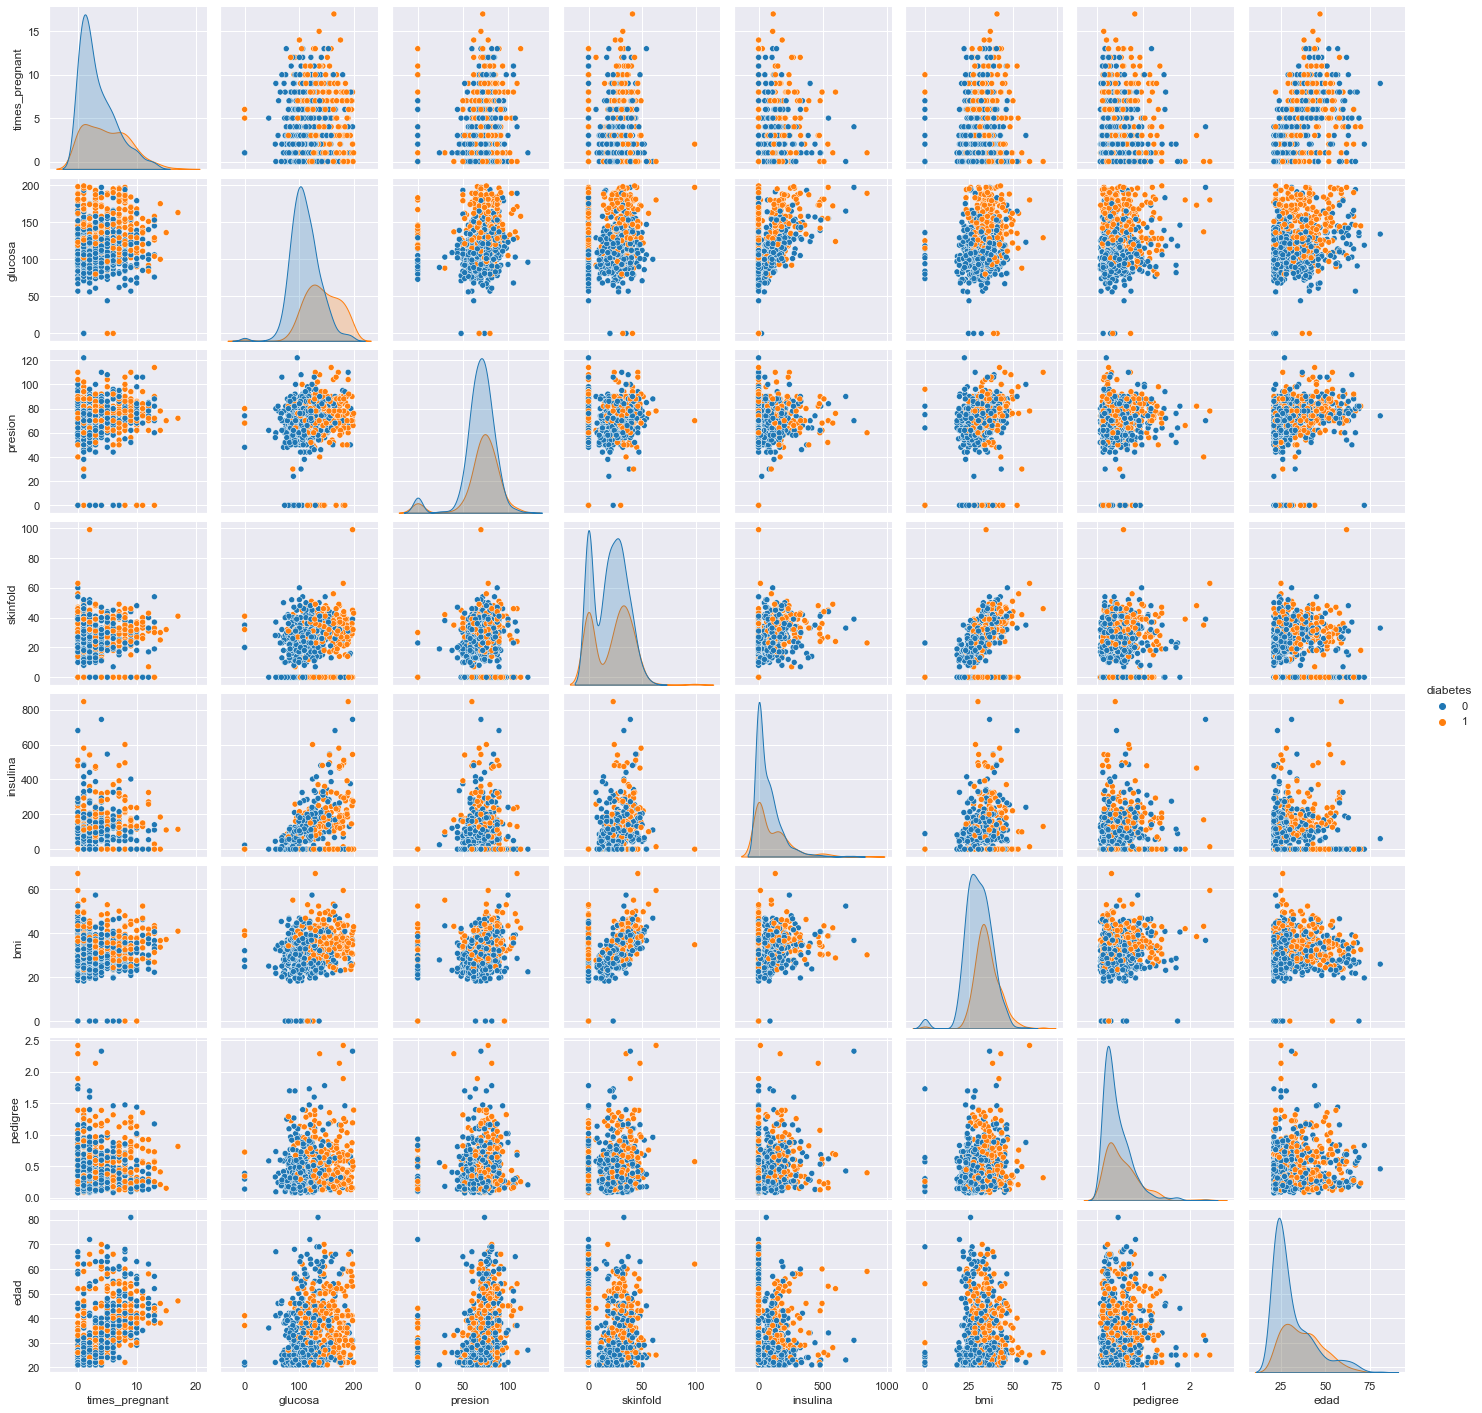

In [8]:
sns.pairplot(df, hue='diabetes')

### Ejercicio 3

Divide los datos en dos partes, df_train y df_test con el 80% y el 20% de los datos repartidos de forma aleatoria.

### Por qué hacemos esto?

In [9]:
### Mezcla el dataframe y utiliza una random_seed = 42
df = df.sample(frac=1, random_state=42)

### Cuanto es el 80% de los datos?
train_size = int(0.8*df.shape[0])

### Crea una df_train y el df_test a partir del resultado anterior y el metodo .loc[]
df_train = df.loc[:train_size]
df_test = df.loc[train_size:]

### Ejercicio 3: Carga la libreria de sklearn que permite entrenar una regresión lineal.

Instancia el modelo bajo el nombre `reg_lr`

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

reg_lr = LinearRegression()

### Ejercicio 4: Entrena el modelo y evalualo con el dataframe de test

In [11]:
X_train = df_train.drop('diabetes', axis=1)

y_train = df_train['diabetes']

##### Entrena el modelo utilizando sólo una variable

In [12]:
predictor_var = 'edad'

In [13]:
reg_lr.fit(X_train[[predictor_var]], y_train)

LinearRegression()

In [14]:
reg_lr.coef_

array([0.00956832])

In [15]:
X_test = df_test.drop('diabetes', axis=1)
y_test = df_test['diabetes']

reg_lr.score(X_test[[predictor_var]], y_test)

0.2196408193964685

## Genera predicciones para un rango posible de la variable independiente

In [19]:
x_min = int(df[predictor_var].min() - 2*df[predictor_var].std())
x_max = int(df[predictor_var].max() + 2*df[predictor_var].std())

X_for_plot = np.linspace(x_min, x_max).reshape(-1, 1)
y_hat = reg_lr.predict(X_for_plot)

In [20]:
#y_hat = reg_lr.predict_proba(X_for_plot)[:, 1]

## Plotea los resultados

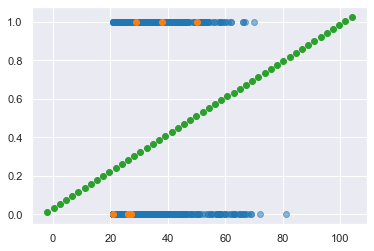

In [21]:
plt.scatter(X_train[predictor_var], y_train, alpha=0.5)
plt.scatter(X_test[predictor_var], y_test)
plt.scatter(X_for_plot, y_hat )

## Por qué no podemos usar una regresión lineal como clasificador ?

Repite el entrenamiento usando una regresión logística (clasificador lineal)